In [1]:
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )
import pinyin as pinyin

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis


# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
api_key = 'aaa47fdcde4f3ddc7519fb20b452e47c'
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc')
print(response.status_code)

200


In [3]:
result = response.json()
titles = result['results']

In [4]:
print(titles[0])

{'adult': False, 'backdrop_path': '/hmNKg4hN2BYftaCJGdKHyETFFki.jpg', 'genre_ids': [10752, 36, 18, 28], 'id': 508935, 'original_language': 'zh', 'original_title': '八佰', 'overview': 'In 1937, eight hundred Chinese soldiers fight under siege from a warehouse in the middle of the Shanghai battlefield, completely surrounded by the Japanese army.', 'popularity': 13.145, 'poster_path': '/2tuJiQQUJNZgEmBgBfNVaYvAnPT.jpg', 'release_date': '2020-08-14', 'title': 'The Eight Hundred', 'video': False, 'vote_average': 7.3, 'vote_count': 55}


In [5]:
print(titles[0].keys())

dict_keys(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'release_date', 'title', 'video', 'vote_average', 'vote_count'])


In [6]:
new_dict = {}

# Start of Dataframe df

In [7]:
for i in range(len(titles)) :
    print(titles[i]['original_title'])
    new_dict[str(titles[i]['original_title'])] = [titles[i]['popularity'], titles[i]['release_date'], titles[i]['vote_count'], titles[i]['id'],titles[i]['release_date']]

八佰
Metallica: WorldWired Tour - Live in Manchester, England - June 18, 2019
Bad Boys for Life
劇場版「鬼滅の刃」無限列車編
Tenet
Sonic the Hedgehog
Dolittle
姜子牙
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)
Wonder Woman 1984
Onward
The Croods: A New Age
The Invisible Man
The Call of the Wild
Manbaby Cries Because He Isn't Added to Discord Chat (Gone Wrong)
晴雅集
Soul
Mulan
Tolo Tolo
Greenland


In [8]:
new_dict

{'八佰': [13.145, '2020-08-14', 55, 508935, '2020-08-14'],
 'Metallica: WorldWired Tour - Live in Manchester, England - June 18, 2019': [3.572,
  '2020-06-08',
  0,
  715904,
  '2020-06-08'],
 'Bad Boys for Life': [464.24, '2020-01-15', 6094, 38700, '2020-01-15'],
 '劇場版「鬼滅の刃」無限列車編': [209.04, '2020-10-16', 498, 635302, '2020-10-16'],
 'Tenet': [484.351, '2020-08-22', 4741, 577922, '2020-08-22'],
 'Sonic the Hedgehog': [129.943, '2020-02-12', 6645, 454626, '2020-02-12'],
 'Dolittle': [34.924, '2020-01-01', 2462, 448119, '2020-01-01'],
 '姜子牙': [16.004, '2020-10-01', 9, 635389, '2020-10-01'],
 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)': [765.14,
  '2020-02-05',
  7151,
  495764,
  '2020-02-05'],
 'Wonder Woman 1984': [1860.647, '2020-12-16', 4355, 464052, '2020-12-16'],
 'Onward': [72.673, '2020-02-29', 4031, 508439, '2020-02-29'],
 'The Croods: A New Age': [757.359, '2020-11-25', 1758, 529203, '2020-11-25'],
 'The Invisible Man': [47.066, '2020-02-26', 3553, 5706

In [9]:
data = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count', 'id','release_date'])
result = data.sort_values('popularity', ascending=False)
resultdata = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id','release_date'])
data

,popularity,release-date,vote count,id,release_date
八佰,13.145,2020-08-14,55,508935,2020-08-14
"Metallica: WorldWired Tour - Live in Manchester, England - June 18, 2019",3.572,2020-06-08,0,715904,2020-06-08
Bad Boys for Life,464.240,2020-01-15,6094,38700,2020-01-15
劇場版「鬼滅の刃」無限列車編,209.040,2020-10-16,498,635302,2020-10-16
Tenet,484.351,2020-08-22,4741,577922,2020-08-22
Sonic the Hedgehog,129.943,2020-02-12,6645,454626,2020-02-12
Dolittle,34.924,2020-01-01,2462,448119,2020-01-01
姜子牙,16.004,2020-10-01,9,635389,2020-10-01
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn),765.140,2020-02-05,7151,495764,2020-02-05
Wonder Woman 1984,1860.647,2020-12-16,4355,464052,2020-12-16


# 2) Finding highest revenue¶

https://dev.to/m0nica/how-to-use-the-tmdb-api-to-find-films-with-the-highest-revenue-82p

In [33]:
# define column names for our new dataframe
columns = ['film', 'revenue','genre', 'no_of_genres']

# create dataframe with film and revenue columns
df = pd.DataFrame(columns=columns)
df

,film,revenue,genre,no_of_genres


In [34]:
titles[0]['genre_ids']

[10752, 36, 18, 28]

In [35]:
en = pinyin.get(titles[0]['original_title'], format="strip", delimiter="")
print(en)

babai


In [43]:
for i in range(len(titles)) :
    en = pinyin.get(titles[i]['original_title'], format="strip", delimiter="")
    if(en.isalnum() == False):    # failed checking for の char
        temp_str = ''
        for k in en :
            if(k.isalnum()):
                temp_str += k
            else :
                temp_str += ' '
        en = temp_str
    titles[i]['original_title'] = en
    

    
titles[3]['original_title'] = 'juchangban guimie ren wuxianliechebian'   # temporary solution for non alpnum char

In [44]:
for i in range(len(titles)) :
    genre = ''
    no_gen = 0
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(titles[i]['id']) +'?api_key='+ api_token+'&language=en-US')
    film_revenue = film_revenue.json()
    title = titles[i]['original_title']
    for i in range(len(film_revenue['genres'])):
        genre += '|'
        genre += film_revenue['genres'][i]['name']
        no_gen += 1
        
    df.loc[len(df)]=[title,film_revenue['revenue'],genre, no_gen] # store title and revenue in our dataframe

Adding to dataframe

In [45]:
df

,film,revenue,genre,no_of_genres
0,babai,460919368,|War|History|Drama|Action,4
1,Metallica WorldWired Tour Live in Mancheste...,426900000,|Music,1
2,Bad Boys for Life,426505244,|Thriller|Action|Crime,3
3,juchangban guimie ren wuxianliechebian,399180000,|Animation|Action|Adventure|Fantasy|Drama,5
4,Tenet,363129000,|Action|Thriller|Science Fiction,3
5,Sonic the Hedgehog,306766470,|Action|Science Fiction|Comedy|Family,4
6,Dolittle,245692007,|Family|Fantasy|Adventure,3
7,jiangziya,240656068,|Animation|Action|Fantasy|Adventure,4
8,Birds of Prey and the Fantabulous Emancipatio...,201858461,|Action|Crime,2
9,Wonder Woman 1984,159533000,|Fantasy|Action|Adventure,3


<AxesSubplot:xlabel='revenue', ylabel='film'>

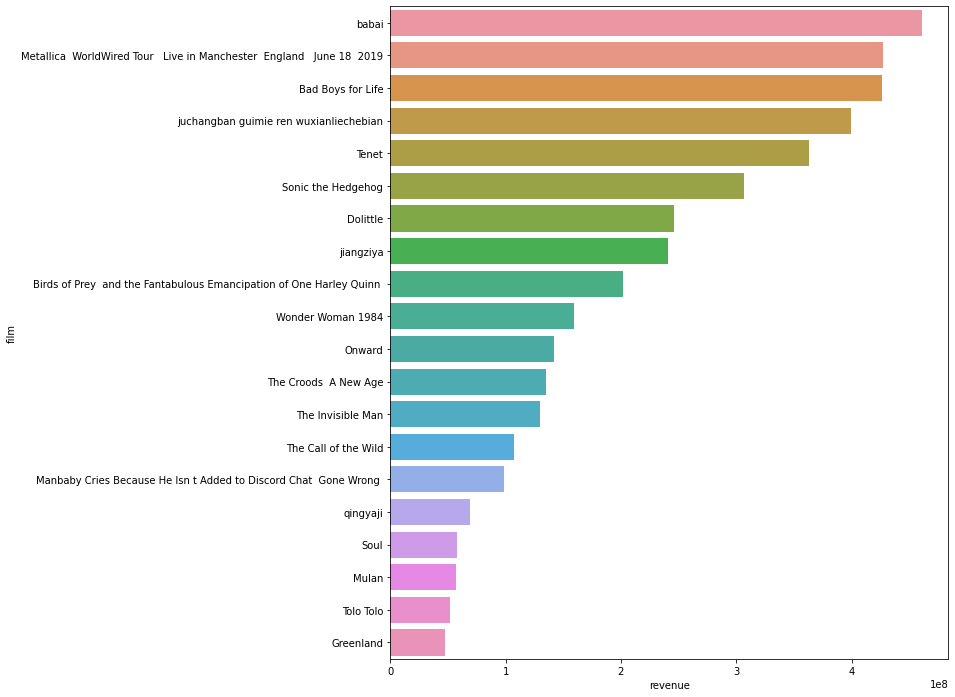

In [46]:
f = plt.figure(figsize=(10, 12))
sb.barplot(x="revenue", y="film", data= df)

## 3) Start of analysis of data by comparing the revenue to genres

In [47]:
film_revenue = requests.get('https://api.themoviedb.org/3/movie/508935?api_key=aaa47fdcde4f3ddc7519fb20b452e47c')
film_revenue = film_revenue.json()

In [48]:
for i in range(len(film_revenue['genres'])):
    print(film_revenue['genres'][i]['name'])

War
History
Drama
Action


In [49]:
film_revenue

{'adult': False,
 'backdrop_path': '/hmNKg4hN2BYftaCJGdKHyETFFki.jpg',
 'belongs_to_collection': None,
 'budget': 80000000,
 'genres': [{'id': 10752, 'name': 'War'},
  {'id': 36, 'name': 'History'},
  {'id': 18, 'name': 'Drama'},
  {'id': 28, 'name': 'Action'}],
 'homepage': 'https://cmc-pictures.com/the-eight-hundred/',
 'id': 508935,
 'imdb_id': 'tt7294150',
 'original_language': 'zh',
 'original_title': '八佰',
 'overview': 'In 1937, eight hundred Chinese soldiers fight under siege from a warehouse in the middle of the Shanghai battlefield, completely surrounded by the Japanese army.',
 'popularity': 13.145,
 'poster_path': '/2tuJiQQUJNZgEmBgBfNVaYvAnPT.jpg',
 'production_companies': [{'id': 112270,
   'logo_path': None,
   'name': 'Beijing Diqi Yinxiang Entertainment',
   'origin_country': ''},
  {'id': 3393,
   'logo_path': None,
   'name': 'Huayi Brothers Pictures',
   'origin_country': 'CN'}],
 'production_countries': [{'iso_3166_1': 'CN', 'name': 'China'}],
 'release_date': '2020

### plotting of graph

Remove empty column and create a new dataframe called gen to see how many of each genre exists

Text(0.5, 0, 'Number of movies')

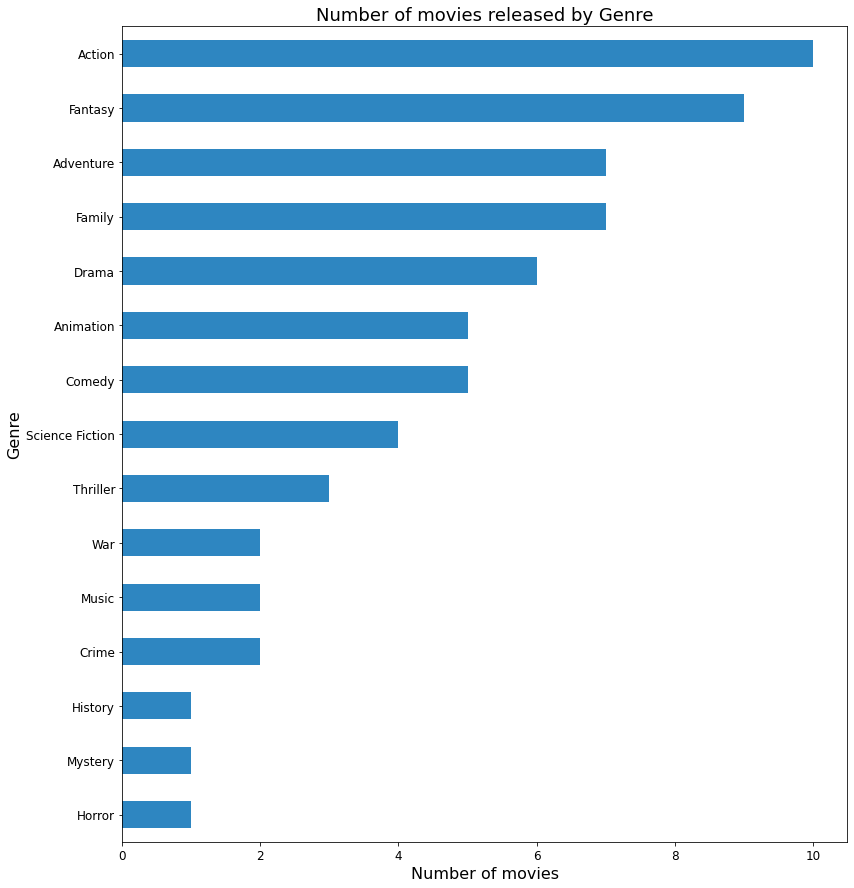

In [50]:
Genre= pd.Series(df['genre'].str.cat(sep = '|').split("|") )
gen = Genre[Genre != '']   #remvoes empty genres
gen.value_counts(ascending=True).plot(kind="barh",figsize=(13,15), fontsize=12,color="#2E86C1")


plt.title("Number of movies released by Genre", fontsize=18)
plt.ylabel("Genre", fontsize=16)
plt.xlabel("Number of movies", fontsize=16)

# Remove duplicate
Creates new dataframe called df_r_g to plot avg rev against genres

In [51]:
df_r_g = gen.drop_duplicates() #df with only genres
df_r_g = pd.DataFrame(data = df_r_g, columns = ["Genres"])

In [52]:
df_r_g.reset_index(drop = True,inplace = True)
df_r_g

,Genres
0,War
1,History
2,Drama
3,Action
4,Music
5,Thriller
6,Crime
7,Animation
8,Adventure
9,Fantasy


There are 15 genres

### Getting average revenue of each genre

Test of sub string in string

In [53]:
Rev = {}
for i in df_r_g.Genres :  #Rev list
    Rev[i] = 0

for i in Rev.keys():
    print(i)
    if i in df.genre[0]:
        print("A")
    


print(df.genre[0])

War
A
History
A
Drama
A
Action
A
Music
Thriller
Crime
Animation
Adventure
Fantasy
Science Fiction
Comedy
Family
Horror
Mystery
|War|History|Drama|Action


#### Total Revenue of each genre

In [54]:
for i in range(len(Rev)+1) :
    for j in Rev.keys():
        if j in df.genre[i] :     # if eg. war in war|history|etc
            Rev[j] += df.revenue[i]   # add revenue
            
        
Rev

{'War': 559919368,
 'History': 460919368,
 'Drama': 1036703994,
 'Action': 2627547611,
 'Music': 426900000,
 'Thriller': 919868905,
 'Crime': 628363705,
 'Animation': 916504517,
 'Adventure': 1294258060,
 'Fantasy': 1390729524,
 'Science Fiction': 869130131,
 'Comedy': 583434919,
 'Family': 936731552,
 'Horror': 130234661,
 'Mystery': 69000000}

#### Average Revenue

In [55]:
# divide Total Revenue of each genre by the number of movies
print(gen.value_counts())


for i in Rev.keys():
    k = gen.value_counts()[i]
    Rev[i] = int(Rev[i]/k)


Rev

Action             10
Fantasy             9
Adventure           7
Family              7
Drama               6
Animation           5
Comedy              5
Science Fiction     4
Thriller            3
War                 2
Music               2
Crime               2
History             1
Mystery             1
Horror              1
dtype: int64


{'War': 279959684,
 'History': 460919368,
 'Drama': 172783999,
 'Action': 262754761,
 'Music': 213450000,
 'Thriller': 306622968,
 'Crime': 314181852,
 'Animation': 183300903,
 'Adventure': 184894008,
 'Fantasy': 154525502,
 'Science Fiction': 217282532,
 'Comedy': 116686983,
 'Family': 133818793,
 'Horror': 130234661,
 'Mystery': 69000000}

This show the average revenue per movie EG : 3 movies with 'War', Add revenue of these 3 movies then divide by 3

In [56]:
df_r_g['AvgRev'] = df_r_g['Genres'].map(Rev)
df_r_g = df_r_g.sort_values(by='AvgRev',ascending = False)

In [57]:
df_r_g

,Genres,AvgRev
1,History,460919368
6,Crime,314181852
5,Thriller,306622968
0,War,279959684
3,Action,262754761
10,Science Fiction,217282532
4,Music,213450000
8,Adventure,184894008
7,Animation,183300903
2,Drama,172783999


#### Adding number of movies for each genre to df_r_g

In [58]:
no_movies = []
for i in df_r_g['Genres'] :
    no_movies.append(gen.value_counts()[i])

In [59]:
df_r_g['no_movies'] = no_movies
df_r_g

,Genres,AvgRev,no_movies
1,History,460919368,1
6,Crime,314181852,2
5,Thriller,306622968,3
0,War,279959684,2
3,Action,262754761,10
10,Science Fiction,217282532,4
4,Music,213450000,2
8,Adventure,184894008,7
7,Animation,183300903,5
2,Drama,172783999,6


Text(0, 0.5, 'Genres')

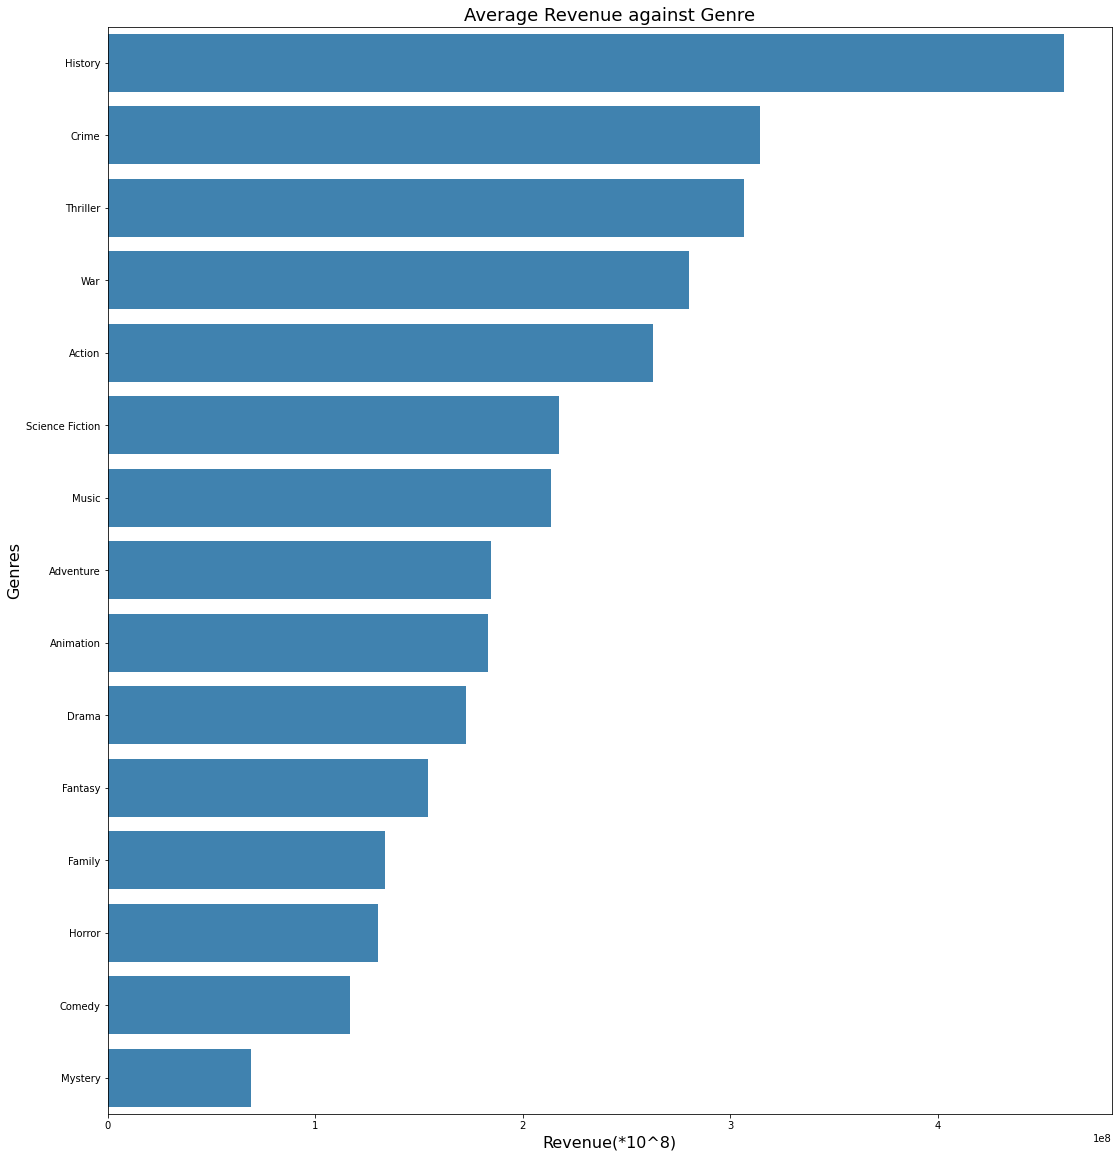

In [60]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(18, 20))
sb.barplot(x = "AvgRev", y = "Genres", data = df_r_g, color="#2E86C1")
plt.title("Average Revenue against Genre", fontsize=18)
plt.xlabel("Revenue(*10^8)", fontsize=16)
plt.ylabel("Genres", fontsize=16)

Text(0, 0.5, 'Genres')

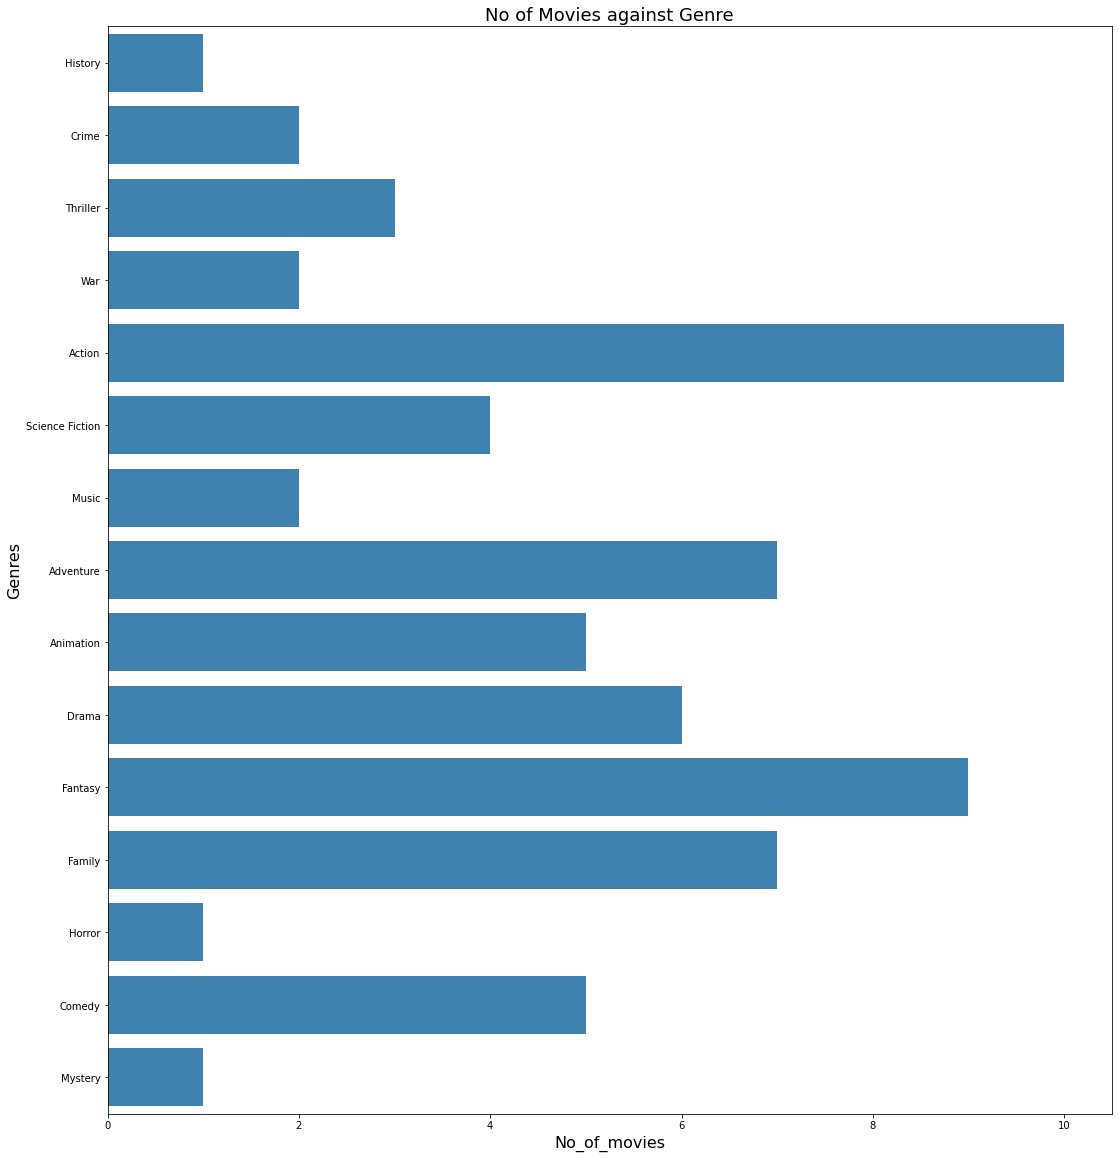

In [61]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(18, 20))
sb.barplot(x = "no_movies", y = "Genres", data = df_r_g, color="#2E86C1")
plt.title("No of Movies against Genre", fontsize=18)
plt.xlabel("No_of_movies", fontsize=16)
plt.ylabel("Genres", fontsize=16)

From the 2 plots above, films that include the action genre tend to get more revenue than the others. As the top 4 genres of History to War does not have many movies, it is not an accurate depiction of what it would be if other films adopted those genres. However, films of action genres are relatively many and their average revenue is still pretty high hence action would be the best genre to add in films

Text(0, 0.5, 'Movies')

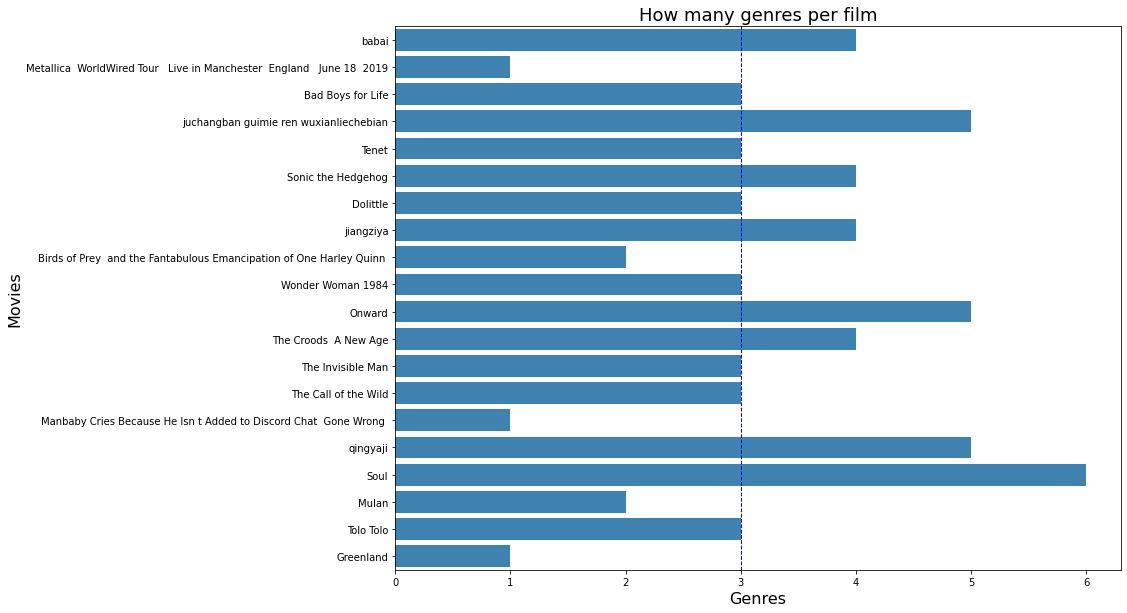

In [62]:
# Draw the Boxplots of all variables
f,ax = plt.subplots(figsize=(13, 10))
sb.barplot(y = "film", x = "no_of_genres", data = df, color="#2E86C1")

avg_no_gen = int(df['no_of_genres'].mean())

ax.axvline(x=avg_no_gen, color='b', label='Average', linestyle='--', linewidth=1)

plt.title("How many genres per film", fontsize=18)
plt.xlabel("Genres", fontsize=16)
plt.ylabel("Movies", fontsize=16)

So the average number of genres per film would be around 3. From the bar plot above, apart from Metallica Tour, in general, most films with at least 3 genres tend to fair better than those with 2 or less genres.

### Analysis of no of genre and revenue

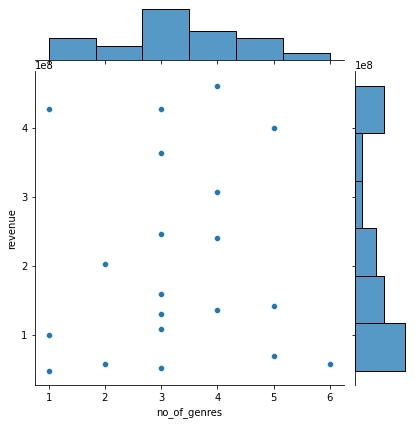

In [63]:
sb.jointplot(data = df, x = "no_of_genres", y = "revenue", height = 6)

In [64]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [65]:
# Extract Response and Predictors
y = pd.DataFrame(df['revenue'])
x = pd.DataFrame(df['no_of_genres'])

In [66]:
linreg.fit(x, y)

LinearRegression()

In [67]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [1.98059666e+08]
Coefficients 	: a =  [[2566776.37086093]]


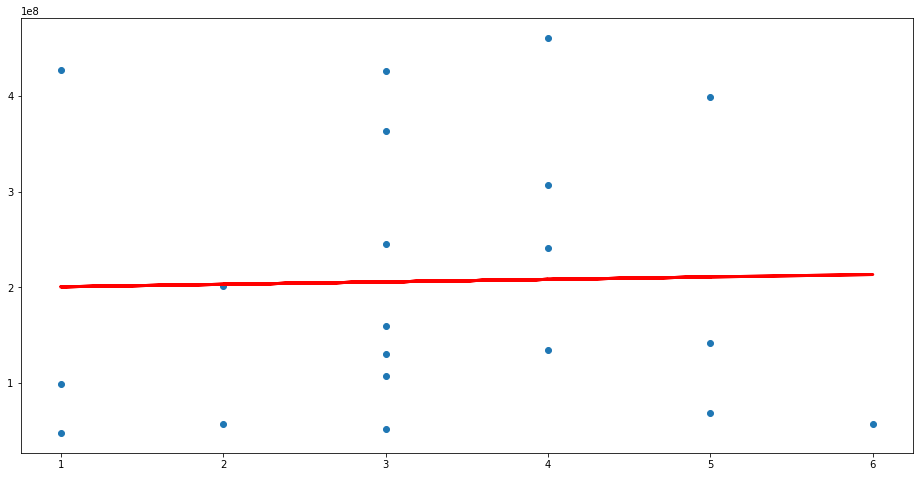

In [68]:
# Formula for the Regression line
regline_x = x
regline_y = linreg.intercept_ + linreg.coef_ * x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(x, y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

From the these plots, it goes to show that more genres doesnt mean higher revenue, and the optimal number of genres per film should be around 2 to 3

## 5) Analysis of Action Movies

As stated previously, action films are the best genres as they have proven to earn the highest revenue on average

In [70]:
# create dataframe with film and revenue columns

act_df = pd.DataFrame(columns = ['revenue'])
for i in df['genre']:
    if 'Action' in i:
        #print(df[df['genre']==i]['revenue'].item())
        act_df.loc[len(act_df)]=[df[df['genre']==i]['revenue'].astype(int).item()] # store title and revenue in our dataframe

act_df

,revenue
0,460919368
1,426505244
2,399180000
3,363129000
4,306766470
5,240656068
6,201858461
7,159533000
8,69000000
9,47800000


### These are the revenue figures for films that include action

<AxesSubplot:>

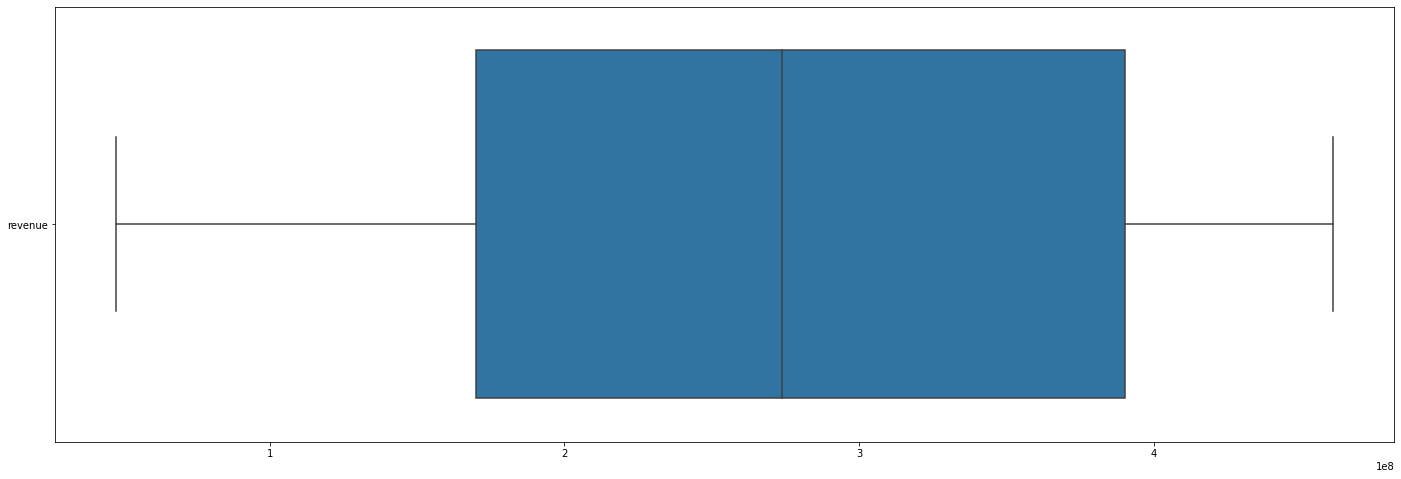

In [71]:
f = plt.figure(figsize=(24, 8))
sb.boxplot(data = act_df, orient = "h")

<AxesSubplot:>

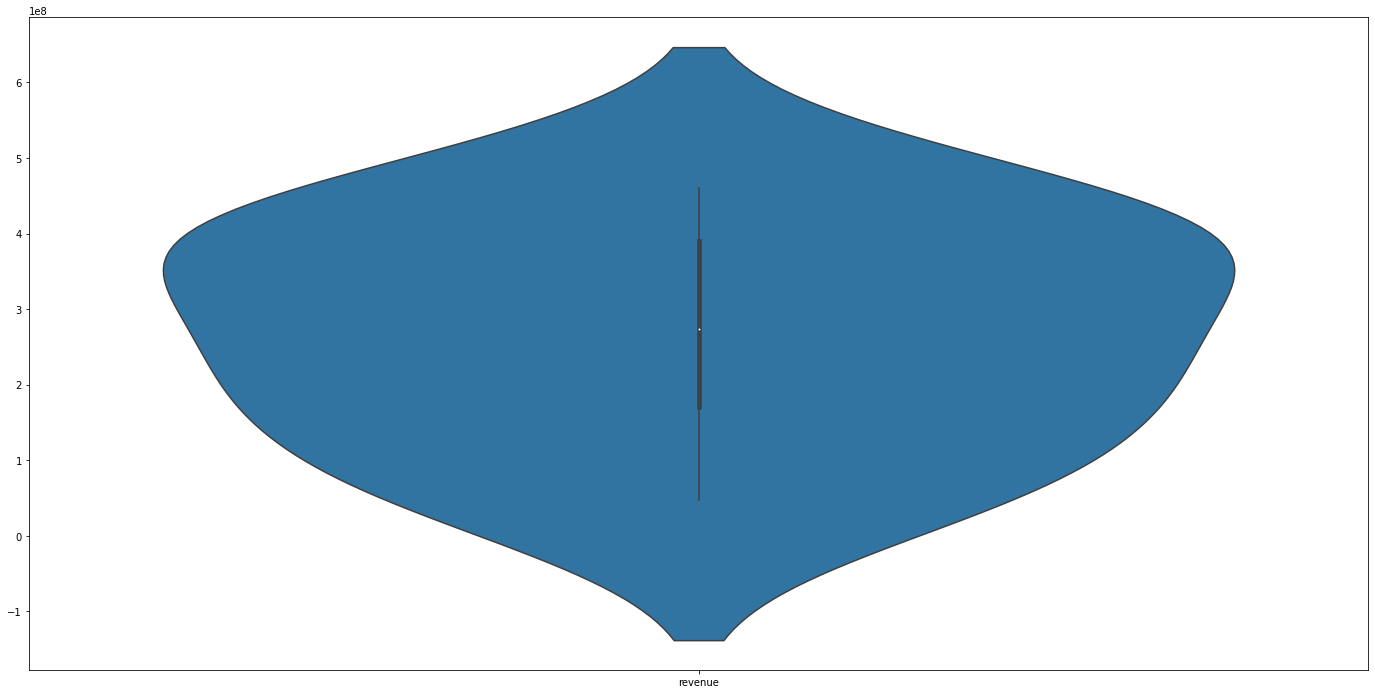

In [72]:
f = plt.figure(figsize=(24, 12))
sb.violinplot(data = act_df)

As can be seen from the 2 plots, the distribution of action movies give rise to on average between 170mil to about 400mil of revenue

#### See if adult affects the popularity 

In [157]:
new_dict = {}

for i in range(len(titles)) :
    new_dict[i] = [titles[i]['popularity'], titles[i]['release_date'], titles[i]['vote_count'], titles[i]['id'], titles[i]['adult']]
    
dataAdult = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id', 'adult'])
columns = ['popularity', 'release-date','vote count', 'id', 'adult']
dataAdult

,popularity,release-date,vote count,id,adult
0,13.145,2020-08-14,55,508935,False
1,3.572,2020-06-08,0,715904,False
2,464.240,2020-01-15,6094,38700,False
3,209.040,2020-10-16,498,635302,False
4,484.351,2020-08-22,4741,577922,False
5,129.943,2020-02-12,6645,454626,False
6,34.924,2020-01-01,2462,448119,False
7,16.004,2020-10-01,9,635389,False
8,765.140,2020-02-05,7151,495764,False
9,1860.647,2020-12-16,4355,464052,False


#### Most popular movies in 5 years

In [227]:
api_key = 'aaa47fdcde4f3ddc7519fb20b452e47c'

response2016 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2016&sort_by=revenue.desc')
result2016 = response2016.json()
titles2016 = result2016['results']

new_dict = {}

for i in range(len(titles2016)) :
    new_dict[i] = [titles2016[i]['popularity'], titles2016[i]['release_date'], titles2016[i]['vote_count'], titles2016[i]['id'], titles2016[i]['adult'], titles2016[i]['original_title']]
    
data2016 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id', 'adult', 'original_title', 'genre'])
columns = ['popularity', 'release-date','vote count', 'id', 'adult', 'original_title', 'genre']
data2016.head(1)

,popularity,release-date,vote count,id,adult,original_title
0,106.35,2016-04-27,17693,271110,False,Captain America: Civil War


In [238]:
response2017 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc')
result2017 = response2017.json()
titles2017 = result2017['results']

new_dict = {}

for i in range(len(titles2017)) :
    new_dict[i] = [titles2017[i]['popularity'], titles2017[i]['release_date'], titles2017[i]['vote_count'], titles2017[i]['id'], titles2017[i]['adult'], titles2017[i]['original_title'], titles2017[i]['genre_ids']]  
data2017 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id', 'adult', 'original_title', 'genre_ids'])
columns = ['popularity', 'release-date','vote count', 'id', 'adult', 'original_title', 'genre_ids']
data2017.head(1)

,popularity,release-date,vote count,id,adult,original_title,genre_ids
0,65.778,2017-12-13,11732,181808,False,Star Wars: The Last Jedi,"[878, 28, 12]"


In [231]:
response2018 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2018&sort_by=revenue.desc')
result2018 = response2018.json()
titles2018 = result2018['results']

new_dict = {}

for i in range(len(titles2018)) :
    new_dict[i] = [titles2018[i]['popularity'], titles2018[i]['release_date'], titles2018[i]['vote_count'], titles2018[i]['id'], titles2018[i]['adult'], titles2018[i]['original_title']. titles2018[i]['genre_ids']]
    
data2018 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id', 'adult', 'original_title', 'genre_ids'])
columns = ['popularity', 'release-date','vote count', 'id', 'adult', 'original_title', 'genre_ids']
data2018.head(1)

,popularity,release-date,vote count,id,adult,original_title
0,328.958,2018-04-25,21284,299536,False,Avengers: Infinity War


In [241]:
response2019 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2019&sort_by=revenue.desc')
result2019 = response2019.json()
titles2019 = result2019['results']

new_dict = {}

for i in range(len(titles2019)) :
    new_dict[i] = [titles2019[i]['popularity'], titles2019[i]['release_date'], titles2019[i]['vote_count'], titles2019[i]['id'], titles2019[i]['adult'], titles2019[i]['original_title'], titles2019[i]['genre_ids']]
    
data2019 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id', 'adult', 'original_title', 'genre_ids'])
columns = ['popularity', 'release-date','vote count', 'id', 'adult', 'original_title', 'genre_ids']
data2019.head(1)

,popularity,release-date,vote count,id,adult,original_title,genre_ids
0,312.724,2019-04-24,17495,299534,False,Avengers: Endgame,"[12, 878, 28]"


In [242]:
response2020 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2020&sort_by=revenue.desc')
result2020 = response2020.json()
titles2020 = result2020['results']

new_dict = {}

for i in range(len(titles2020)) :
    new_dict[i] = [titles2020[i]['popularity'], titles2020[i]['release_date'], titles2020[i]['vote_count'], titles2020[i]['id'], titles2020[i]['adult'], titles2020[i]['original_title'], titles2020[i]['genre_ids']]
    
data2020 = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['popularity', 'release-date', 'vote count','id', 'adult', 'original_title', 'genre_ids'])
columns = ['popularity', 'release-date','vote count', 'id', 'adult', 'original_title', 'genre_ids']
data2020.head(1)

,popularity,release-date,vote count,id,adult,original_title,genre_ids
0,13.145,2020-08-14,55,508935,False,八佰,"[10752, 36, 18, 28]"


In [243]:
result = data2016.append(data2016).append(data2017).append(data2018).append(data2019).append(data2020)
result = result.sort_values(by='popularity', ascending = False)
result.head(50)

result.reset_index(drop = True, inplace = True)
resultTop5 = result[0:5]
resultTop5

,popularity,release-date,vote count,id,adult,original_title,genre_ids
0,1860.647,2020-12-16,4355,464052,False,Wonder Woman 1984,"[14, 28, 12]"
1,822.133,2020-12-25,5312,508442,False,Soul,"[10751, 16, 35, 18, 10402, 14]"
2,765.140,2020-02-05,7151,495764,False,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 80]"
3,757.359,2020-11-25,1758,529203,False,The Croods: A New Age,"[10751, 14, 16, 35]"
4,581.815,2017-11-15,10288,141052,False,Justice League,"[28, 12, 14, 878]"


<AxesSubplot:xlabel='vote count', ylabel='original_title'>

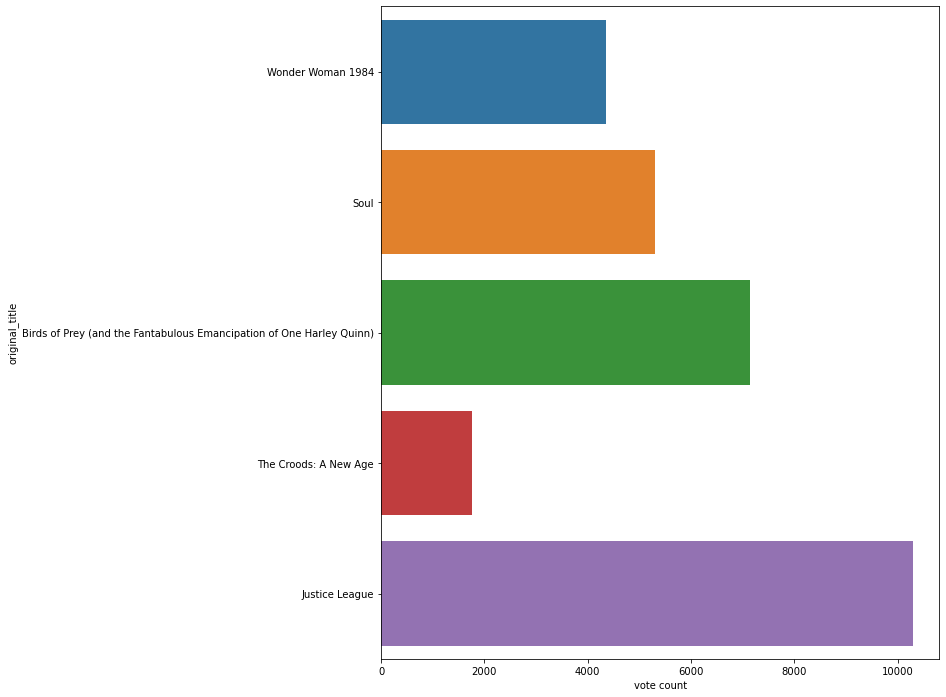

In [302]:
f = plt.figure(figsize=(10, 12))
sb.barplot(x="vote count", y="original_title", data= resultTop5)

`Wonder Woman 1984`, `Soul`, `Birds of Prey`, `The croods: A New Age` and `Justice League` are the Top 5 movies in the last 5 years

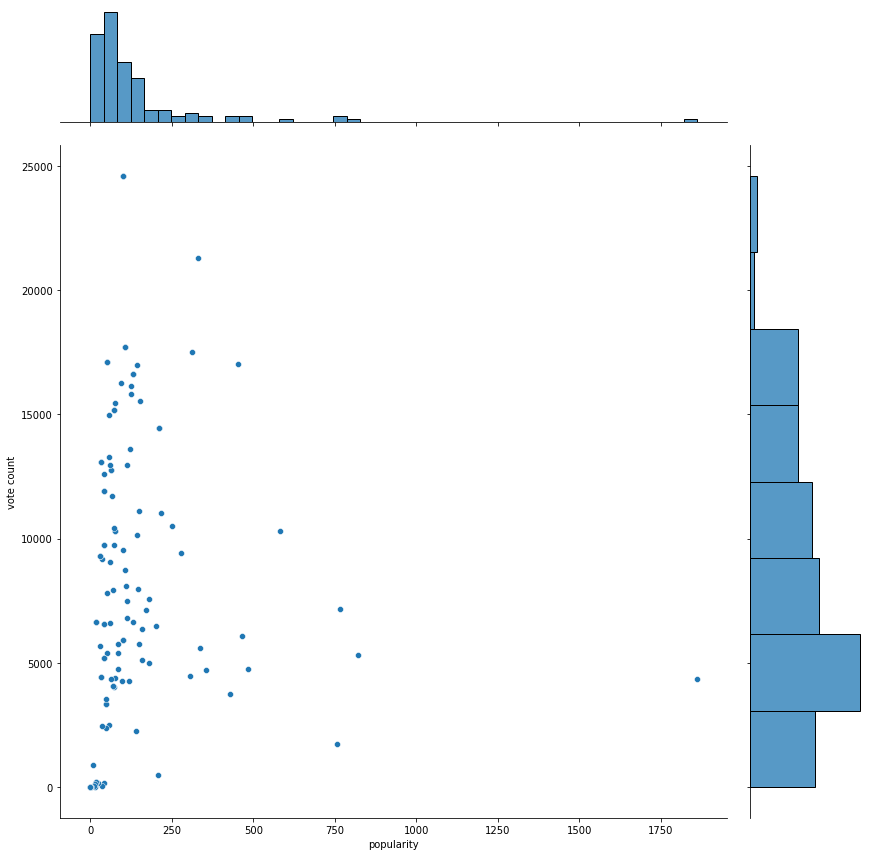

In [312]:
sb.jointplot(data = result, x = "popularity", y = "vote count", height = 12)

The above graph shows the relationship between popularity and vote count for the last 5 years. It is evident that popularity and vote count `DOES NOT` have a direct relation. With that in mind, we will dive deeper in the co-relation between runtime, vote_average, revenue and popularity

In [313]:
result.corr()

,popularity,vote count,id,adult
popularity,1.000000,-0.001321,0.085016,NaN
vote count,-0.001321,1.000000,-0.480326,NaN
id,0.085016,-0.480326,1.000000,NaN
adult,NaN,NaN,NaN,NaN
